In [85]:
import pandas as pd

In [86]:
pd.DataFrame({'yes':['a','b'],'no':['c','d']})

,yes,no
0,a,c
1,b,d


In [87]:
pd.Series([30,40,50])

0    30
1    40
2    50
dtype: int64

In [88]:
df=pd.read_csv("Data_Train.csv")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [90]:
df.shape

(10683, 11)

In [91]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [92]:
df.dropna(inplace=True)

In [93]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [94]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [95]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [96]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [97]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [98]:
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [99]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [100]:
df['Journey_Hour'] = df['Dep_Time'].dt.hour

In [101]:
df['Journey_Minute'] = df['Dep_Time'].dt.minute

In [102]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [103]:
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [104]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

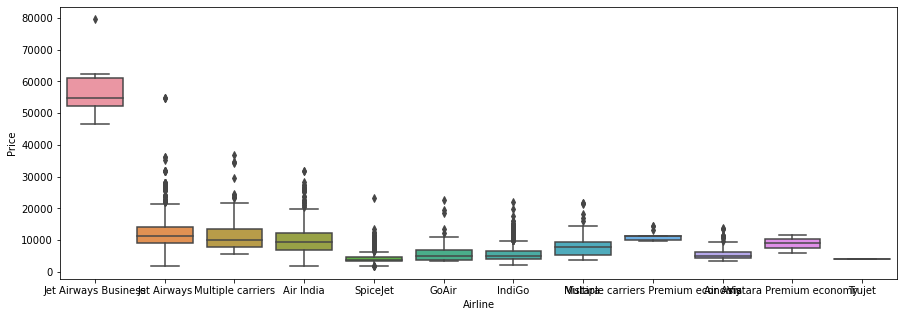

In [106]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

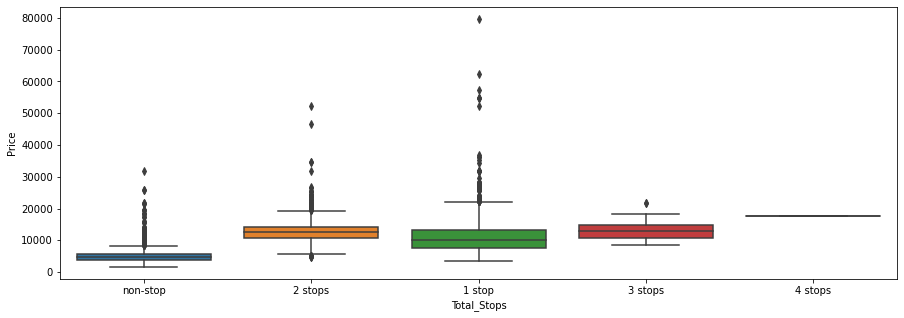

In [107]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [108]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

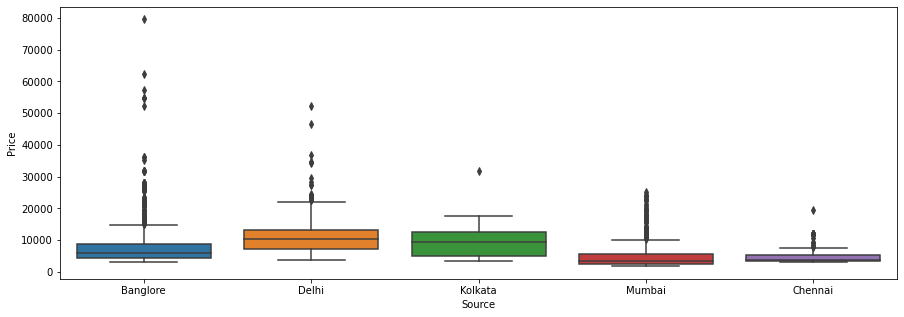

In [109]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

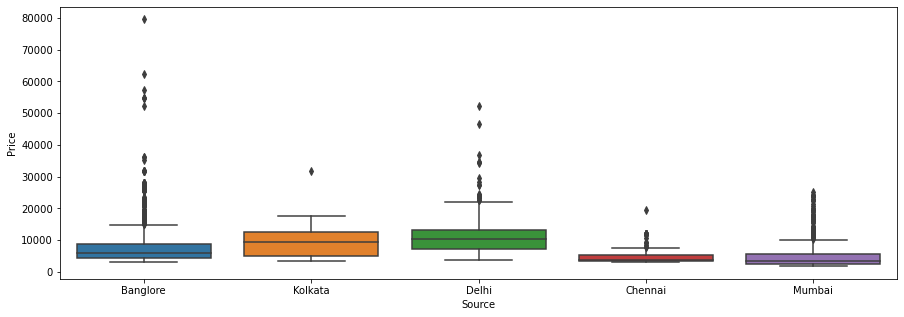

In [110]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

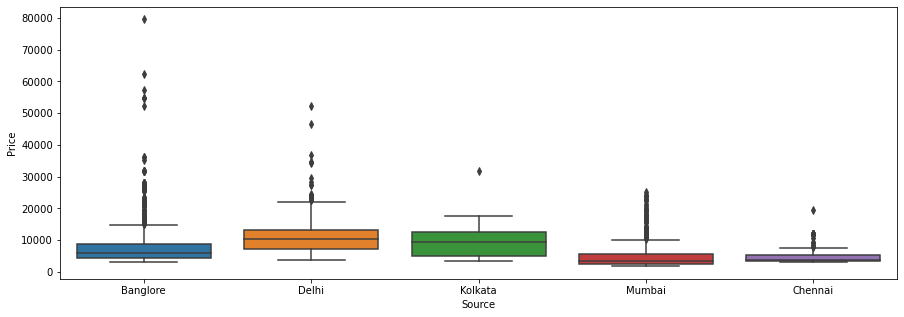

In [111]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))

In [112]:
Source= pd.get_dummies(df['Source'],drop_first=True)
Source.head()                       

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [113]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [114]:
Destination= pd.get_dummies(df['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [115]:
df.drop('Additional_Info',axis=1,inplace=True)

In [116]:
df['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [117]:
df['Route_1']=df['Route'].str.split('?').str[0]
df['Route_2']=df['Route'].str.split('?').str[1]
df['Route_3']=df['Route'].str.split('?').str[2]
df['Route_4']=df['Route'].str.split('?').str[3]
df['Route_5']=df['Route'].str.split('?').str[4]

In [118]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
encoder=LabelEncoder()

In [121]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i]=encoder.fit_transform(df[i])    

In [122]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,0,34,8,13,5


In [123]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [124]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [125]:
df['Total_Stops']=df['Total_Stops'].map(dic)

In [126]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1,13302,3,1,16,50,21,35,0,34,8,13,5


In [127]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i]+ ' 0m'
            print(duration[i])
        else:
            duration[i]= '0h '+duration[i]
            print(duration[i])

19h 0m
23h 0m
22h 0m
12h 0m
3h 0m
5h 0m
10h 0m
18h 0m
3h 0m
24h 0m
15h 0m
16h 0m
8h 0m
14h 0m
8h 0m
20h 0m
13h 0m
16h 0m
10h 0m
12h 0m
3h 0m
11h 0m
15h 0m
9h 0m
8h 0m
3h 0m
3h 0m
27h 0m
8h 0m
3h 0m
9h 0m
3h 0m
11h 0m
3h 0m
3h 0m
5h 0m
27h 0m
26h 0m
10h 0m
11h 0m
9h 0m
4h 0m
5h 0m
3h 0m
3h 0m
16h 0m
7h 0m
9h 0m
9h 0m
24h 0m
5h 0m
14h 0m
3h 0m
11h 0m
9h 0m
13h 0m
5h 0m
3h 0m
3h 0m
30h 0m
18h 0m
8h 0m
12h 0m
3h 0m
5h 0m
14h 0m
3h 0m
4h 0m
11h 0m
8h 0m
5h 0m
21h 0m
27h 0m
20h 0m
3h 0m
3h 0m
12h 0m
11h 0m
24h 0m
3h 0m
9h 0m
11h 0m
5h 0m
27h 0m
20h 0m
8h 0m
26h 0m
3h 0m
10h 0m
28h 0m
3h 0m
10h 0m
7h 0m
8h 0m
3h 0m
8h 0m
3h 0m
26h 0m
11h 0m
3h 0m
20h 0m
47h 0m
3h 0m
10h 0m
15h 0m
13h 0m
14h 0m
6h 0m
24h 0m
11h 0m
10h 0m
5h 0m
16h 0m
15h 0m
10h 0m
3h 0m
5h 0m
14h 0m
11h 0m
11h 0m
3h 0m
22h 0m
16h 0m
12h 0m
3h 0m
26h 0m
5h 0m
10h 0m
13h 0m
8h 0m
3h 0m
26h 0m
10h 0m
12h 0m
9h 0m
10h 0m
8h 0m
3h 0m
11h 0m
3h 0m
22h 0m
8h 0m
27h 0m
3h 0m
3h 0m
3h 0m
19h 0m
9h 0m
15h 0m
3h 0m
10h 0m
6h 0m
5h 0m
3h 

In [128]:
print(duration)

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [129]:
df['Duration']=duration

In [130]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [131]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [132]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)

In [133]:
df.drop('Duration',axis=1,inplace=True)

In [134]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_Day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Route_5                    int32
Duration_hours            object
Duration_mins             object
dtype: object

In [135]:
df=pd.concat([df,Source,Airline,Destination],axis=1)

In [136]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,22,20,1,10,0,13,29,13,5,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,5,50,13,15,2,25,1,3,5,7,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,9,25,4,25,3,32,4,5,5,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,18,5,23,30,2,34,3,13,5,5,25,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,16,50,21,35,0,34,8,13,5,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [137]:
pd.set_option('display.max_columns',41)

In [138]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,22,20,1,10,0,13,29,13,5,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,5,50,13,15,2,25,1,3,5,7,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,9,25,4,25,3,32,4,5,5,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,18,5,23,30,2,34,3,13,5,5,25,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,16,50,21,35,0,34,8,13,5,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [139]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [140]:
df.shape

(10682, 35)

In [141]:
X=df.drop('Price',axis=1)

In [142]:
y=df['Price']

In [143]:
from sklearn.feature_selection import mutual_info_classif

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [148]:
from sklearn import metrics
import numpy as np

In [170]:
def model(algo):
    my_model = algo.fit(X_train,y_train)
    print('train_score',my_model.score(X_train,y_train))
    y_pred=my_model.predict(X_test)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2_score:',r2_score)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    print('mean absolute error:',mae)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',rmse)
    sns.distplot(y_test-y_pred)

In [171]:
from sklearn.linear_model import LinearRegression

train_score 0.6335622850588984
r2_score: 0.6007981109294109
mean absolute error: 2017.0696949888431
RMSE: 2865.9129488795475


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


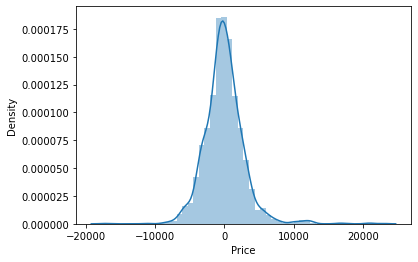

In [172]:
model(LinearRegression())

In [175]:
from sklearn.tree import DecisionTreeRegressor

train_score 0.9703315319709424
r2_score: 0.6474569589441785
mean absolute error: 1394.3941818749024
RMSE: 2693.225848867605


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


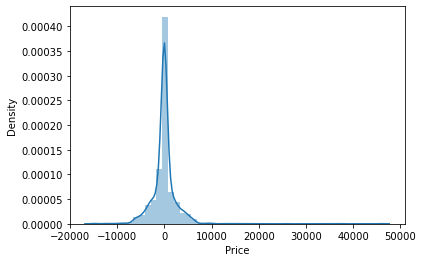

In [176]:
model(DecisionTreeRegressor())

In [179]:
from sklearn.ensemble import RandomForestRegressor

train_score 0.952958645668384
r2_score: 0.7994201432629706
mean absolute error: 1165.2737827236326
RMSE: 2031.4697475135617


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


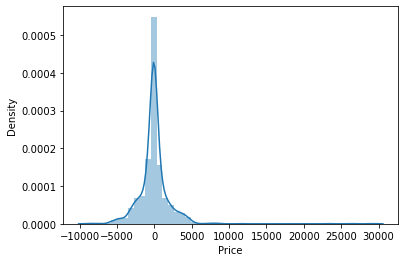

In [181]:
model(RandomForestRegressor())